In [65]:
import pandas as pd
import numpy as np
import seaborn as sns

In [66]:
df = pd.read_csv("1-uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [67]:
df.isna().sum()
df.dropna(inplace=True)

In [68]:
df['distance']= np.sqrt((df['pickup_longitude'] - df['dropoff_longitude'])**2 + (df['pickup_latitude'] - df['dropoff_latitude'])**2)
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,0.015140
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,0.022103
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,0.053109
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,0.016528
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,0.051031


In [69]:
df=df.drop(['pickup_datetime','key','Unnamed: 0', 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis=1)
df.head()

,fare_amount,passenger_count,distance
0,7.5,1,0.015140
1,7.7,1,0.022103
2,12.9,1,0.053109
3,5.3,3,0.016528
4,16.0,5,0.051031


<Axes: xlabel='distance', ylabel='fare_amount'>

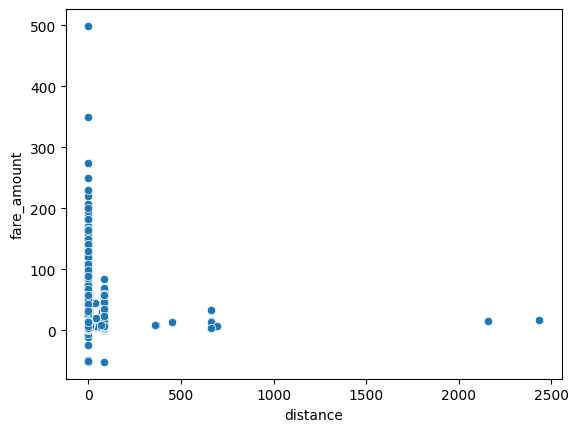

In [70]:
sns.scatterplot(x='distance', y='fare_amount', data=df)

<Axes: xlabel='distance', ylabel='fare_amount'>

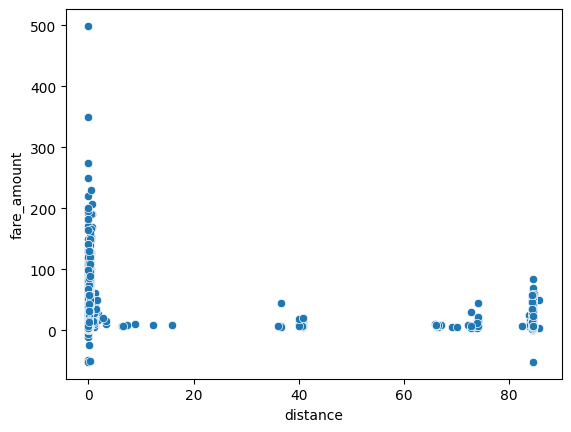

In [71]:
df = df[(df['distance'] <= 300) & (df['fare_amount'] <= 500)]
sns.scatterplot(x='distance', y='fare_amount', data=df)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [73]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [74]:
from sklearn.metrics import root_mean_squared_error, r2_score
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Root Mean Squared Error: 9.575521699720982
R^2 Score: 0.0007940389695969552


In [75]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [76]:
from sklearn.metrics import root_mean_squared_error, r2_score
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Root Mean Squared Error: 5.367503367472506
R^2 Score: 0.6860396693192172
